In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../raw/categories.txt", sep=" = ", header=None, names=["Category","Count"])
df = df.set_index('Category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


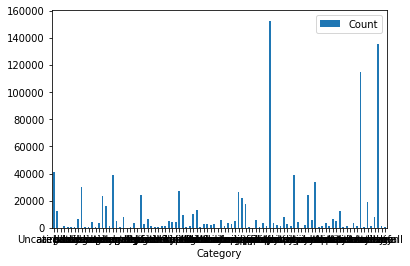

In [3]:
import matplotlib.pyplot as plt
ax = df.plot.bar(rot=0)

In [4]:
df

,Count
Category,
Uncategorized,41483
airport,12417
area code,142
bank,1251
battle,344
bay,630
beach,850
bridge,6658
building,29938


Text(0.5, 1.0, 'Article Counts of Top 20 Article Categories')

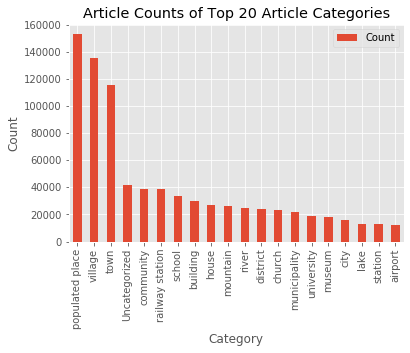

In [4]:
matplotlib.style.use('ggplot')
df = df.sort_values(by = ['Count'], ascending=False)
# df.head()
ax = df.head(20).plot.bar()
plt.ylabel("Count")
plt.title("Article Counts of Top 20 Article Categories")

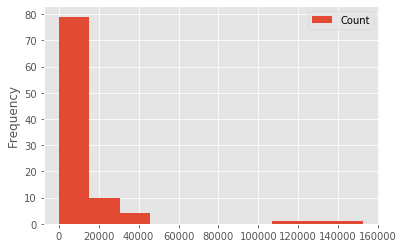

In [5]:
histplot = df.plot.hist()

Text(0.5, 1.0, 'Number of Articles per Category, Log Scale')

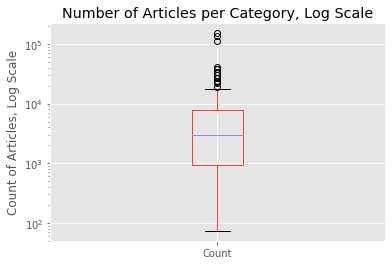

In [6]:
boxplot = df.boxplot(column=['Count'])
plt.yscale("log")
plt.ylabel("Count of Articles, Log Scale")
plt.title("Number of Articles per Category, Log Scale")

In [ ]:
import os

def get_immediate_subfiles(a_dir):
    return [f for f in os.listdir(a_dir)
            if os.path.isfile(os.path.join(a_dir, f))]

coord_files = get_immediate_subfiles("../raw")
coord_df = pd.DataFrame(columns=["Lat","Lon"])
for file in coord_files:
    if "coord" in file:
        with open("../raw/" + file, "r", encoding="Latin-1") as text_file:
            for line in text_file:
                if coord_df.shape[0] % 1000 == 0:
                    print(coord_df.shape[0])
                if "{{coord" in line:
                    j = [line.find("display"), line.find("region"), line.find("type"), line.find("dim"), line.find("format"), line.find("scale"), line.find("}}"), line.find("source"), line.find("name"), line.find("missing")]
                    try:
                        end_index = min([i for i in j if i >= 0])
                    except:
                        print("empty coords")
                    coord_line = line[line.find("{{coord")+7:end_index]
                    coord_vec = [i.strip() for i in coord_line.split("|") if (i != "")]
                    updated_coord_vec = []
                    if len(coord_vec) != 0 and len(coord_vec) % 2 != 1:
                        for entry in coord_vec:
                            if entry.upper() not in ["E","N","W","S"]:
                                try:
                                    updated_coord_vec.append(float(entry))
                                except ValueError:
                                    print("Not a float")
                            else:
                                updated_coord_vec.append(entry.upper())
                    if len(updated_coord_vec) != 0 and len(updated_coord_vec) % 2 != 1:
                        if len(updated_coord_vec) == 2:
                            try:
                                coord_df = coord_df.append({"Lat": updated_coord_vec[0], "Lon": updated_coord_vec[1]},ignore_index=True)
                            except:
                                print("stupid format error")
                        elif len(updated_coord_vec) == 4:
                            try:
                                lat, lon = (updated_coord_vec[0], updated_coord_vec[2])
                                if updated_coord_vec[1] == "S":
                                    lat = -lat
                                if updated_coord_vec[3] == "W":
                                    lon = -lon
                                coord_df = coord_df.append({"Lat": lat, "Lon": lon},ignore_index=True)
                            except:
                                print("stupid format error")
                        elif len(updated_coord_vec) == 6:
                            try:
                                lat = updated_coord_vec[0] + updated_coord_vec[1] * (1/60)
                                lon = updated_coord_vec[3] + updated_coord_vec[4] * (1/60)
                                if updated_coord_vec[2] == "S":
                                    lat = -lat
                                if updated_coord_vec[5] == "W":
                                    lon = -lon
                                coord_df = coord_df.append({"Lat": lat, "Lon": lon},ignore_index=True)
                            except:
                                print("stupid format error")
                        else:
                            try:
                                lat = updated_coord_vec[0] + updated_coord_vec[1] * (1/60) + updated_coord_vec[2] * (1/3600)
                                lon = updated_coord_vec[4] + updated_coord_vec[5] * (1/60) + updated_coord_vec[6] * (1/3600)
                                if updated_coord_vec[3] == "S":
                                    lat = -lat
                                if updated_coord_vec[7] == "W":
                                    lon = -lon
                                coord_df = coord_df.append({"Lat": lat, "Lon": lon},ignore_index=True)
                            except:
                                print("stupid format error")
            coord_df.to_csv(file[:-4] + ".csv")
            coord_df = pd.DataFrame(pd.DataFrame(columns=["Lat","Lon"]))
coord_df.head()

In [16]:
master_coord_df = pd.DataFrame(columns=["Lat", "Lon"])
curr_files = get_immediate_subfiles(".")
count = 0
for file in curr_files:
    if "coord" in file:
        df = pd.read_csv('./'+file, header=0, index_col=0)
        count += 1
        print(str(count) + "-" + file)
        master_coord_df = master_coord_df.append(df, ignore_index=True)
master_coord_df.head()

1-coordinate_articles_airport.csv
2-coordinate_articles_area_code.csv
3-coordinate_articles_bank.csv
4-coordinate_articles_battle.csv
5-coordinate_articles_bay.csv
6-coordinate_articles_beach.csv
7-coordinate_articles_bridge.csv
8-coordinate_articles_building.csv
9-coordinate_articles_bus_station.csv
10-coordinate_articles_camp.csv
11-coordinate_articles_castle.csv
12-coordinate_articles_cave.csv
13-coordinate_articles_cemetery.csv
14-coordinate_articles_church.csv
15-coordinate_articles_city.csv
16-coordinate_articles_college.csv
17-coordinate_articles_community.csv
18-coordinate_articles_company.csv
19-coordinate_articles_country.csv
20-coordinate_articles_county.csv
21-coordinate_articles_crater.csv
22-coordinate_articles_culture.csv
23-coordinate_articles_dam.csv
24-coordinate_articles_desert.csv
25-coordinate_articles_district.csv
26-coordinate_articles_establishment.csv
27-coordinate_articles_event.csv
28-coordinate_articles_farm.csv
29-coordinate_articles_forest.csv
30-coordinat

,Lat,Lon
0,51.6425,-121.307
1,51.6425,-121.307
2,53.3947,16.0831
3,54.0267,19.1364
4,54.0267,19.1364


In [17]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'legend.title_fontsize'    : 'xx-large',
          'figure.figsize': (25, 15),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [28]:
master_coord_df= master_coord_df[master_coord_df["Lat"] != "N"]
master_coord_df= master_coord_df[master_coord_df["Lat"] != "S"]
master_coord_df= master_coord_df[master_coord_df["Lon"] != "E"]
master_coord_df= master_coord_df[master_coord_df["Lon"] != "W"]

master_coord_df.describe()

,Lat,Lon
count,2302009.00,2302009.0
unique,506999.00,637950.0
top,51.95,37.0
freq,622.00,430.0


In [38]:
import numpy as np

master_coord_df=master_coord_df[master_coord_df.applymap(lambda x: isinstance(x, (int, float)))]
master_coord_df["Lat"] = pd.to_numeric(master_coord_df["Lat"])
master_coord_df["Lon"] = pd.to_numeric(master_coord_df["Lon"])

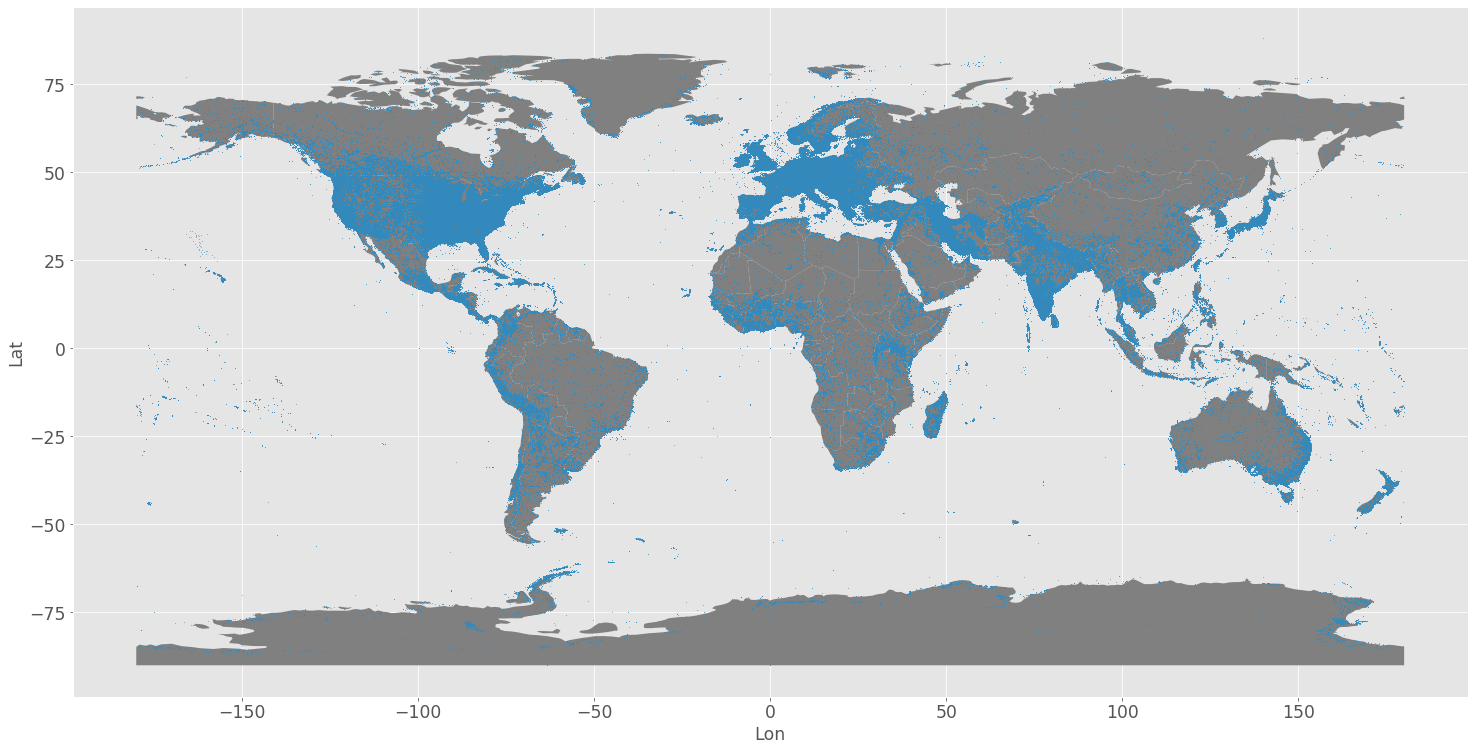

In [39]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.at[world.iso_a3=='TLS', 'name'] = 'Timor'

ax = world.plot(color="grey")
master_coord_df.plot(ax=ax, x='Lon', y='Lat', kind='scatter', s=0.1)

In [68]:
import requests

from shapely.geometry import mapping, shape
from shapely.prepared import prep
from shapely.geometry import Point

imr_5yr = pd.read_csv("InfantMortality_Cluster5Year.csv")


data = requests.get("https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson").json()

countries = {}
for feature in data["features"]:
    geom = feature["geometry"]
    country = feature["properties"]["ADMIN"]
    countries[country] = prep(shape(geom))

print(countries['Armenia'])

def get_country(lon, lat):
    point = Point(lon, lat)
    for key, value in countries.items():
        if value.contains_properly(point):
            return key

    return "unknown"

countries_list = imr_5yr.country.unique()

country_coord_df= pd.DataFrame(columns=["Lat","Lon","Country"])
count = 0
for index, row in master_coord_df.iterrows():
    if count % 1000 == 0:
        print(count)
    country = get_country(row.Lon, row.Lat)
    count+=1
    if country in countries_list:
        country_coord_df = country_coord_df.append({"Lat": row.Lat, "Lon": row.Lon, "Country": country}, ignore_index=True)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1156000
1157000
1158000
1159000
1160000
1161000
1162000
1163000
1164000
1165000
1166000
1167000
1168000
1169000
1170000
1171000
1172000
1173000
1174000
1175000
1176000
1177000
1178000
1179000
1180000
1181000
1182000
1183000
1184000
1185000
1186000
1187000
1188000
1189000
1190000
1191000
1192000
1193000
1194000
1195000
1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
1233000
1234000
1235000
1236000
1237000
1238000
1239000
1240000
1241000
1242000
1243000
1244000
1245000
1246000
1247000
1248000
1249000
1250000
1251000
1252000
1253000
1254000
1255000
1256000
1257000
1258000
1259000
1260000
1261000
1262000
1263000
1264000
1265000
1266000
1267000
1268000
1269000
1270000
1271000
1272000
1273000
1274000
1275000
1276000
1277000
1278000
1279000
1280000


2181000
2182000
2183000
2184000
2185000
2186000
2187000
2188000
2189000
2190000
2191000
2192000
2193000
2194000
2195000
2196000
2197000
2198000
2199000
2200000
2201000
2202000
2203000
2204000
2205000
2206000
2207000
2208000
2209000
2210000
2211000
2212000
2213000
2214000
2215000
2216000
2217000
2218000
2219000
2220000
2221000
2222000
2223000
2224000
2225000
2226000
2227000
2228000
2229000
2230000
2231000
2232000
2233000
2234000
2235000
2236000
2237000
2238000
2239000
2240000
2241000
2242000
2243000
2244000
2245000
2246000
2247000
2248000
2249000
2250000
2251000
2252000
2253000
2254000
2255000
2256000
2257000
2258000
2259000
2260000
2261000
2262000
2263000
2264000
2265000
2266000
2267000
2268000
2269000
2270000
2271000
2272000
2273000
2274000
2275000
2276000
2277000
2278000
2279000
2280000
2281000
2282000
2283000
2284000
2285000
2286000
2287000
2288000
2289000
2290000
2291000
2292000
2293000
2294000
2295000
2296000
2297000
2298000
2299000
2300000
2301000
2302000


In [80]:
country_coord_df.head()
# countries = imr_5yr.country.unique()
# country_coord_df=country_coord_df[country_coord_df.applymap(lambda x: isinstance(x, (int, float)))]
# country_coord_df["Lat"] = pd.to_numeric(country_coord_df["Lat"])
# country_coord_df["Lon"] = pd.to_numeric(country_coord_df["Lon"])
# for country in countries:
#     ax = world.loc[world.name==country].plot(color='grey')
#     ax.set_title(country)
#     country_coord_df[country_coord_df["Country"] == country].plot(ax=ax, x='Lon', y='Lat', kind='scatter', s=1)

,Lat,Lon,Country


In [ ]:
word_len_list = []
for file in coord_files:
    if "coord" in file:
        with open("../raw/" + file, "r", encoding="Latin-1") as text_file:
            article = ""
            prevLineCategory = False
            for line in text_file:
                if len(word_len_list) % 1000 == 0:
                    prinword_len_listn(word_len_list))
                article += line
                if "[[Category" in line:
                    prevLineCategory = True
                elif prevLineCategory:
                    for char in '-.,\n':
                        article=article.replace(char, ' ')
                    article = article.lower()
                    word_len_list.append(len(article.split()))
                    article=""

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: covariance is not symmetric positive-semidefinite.


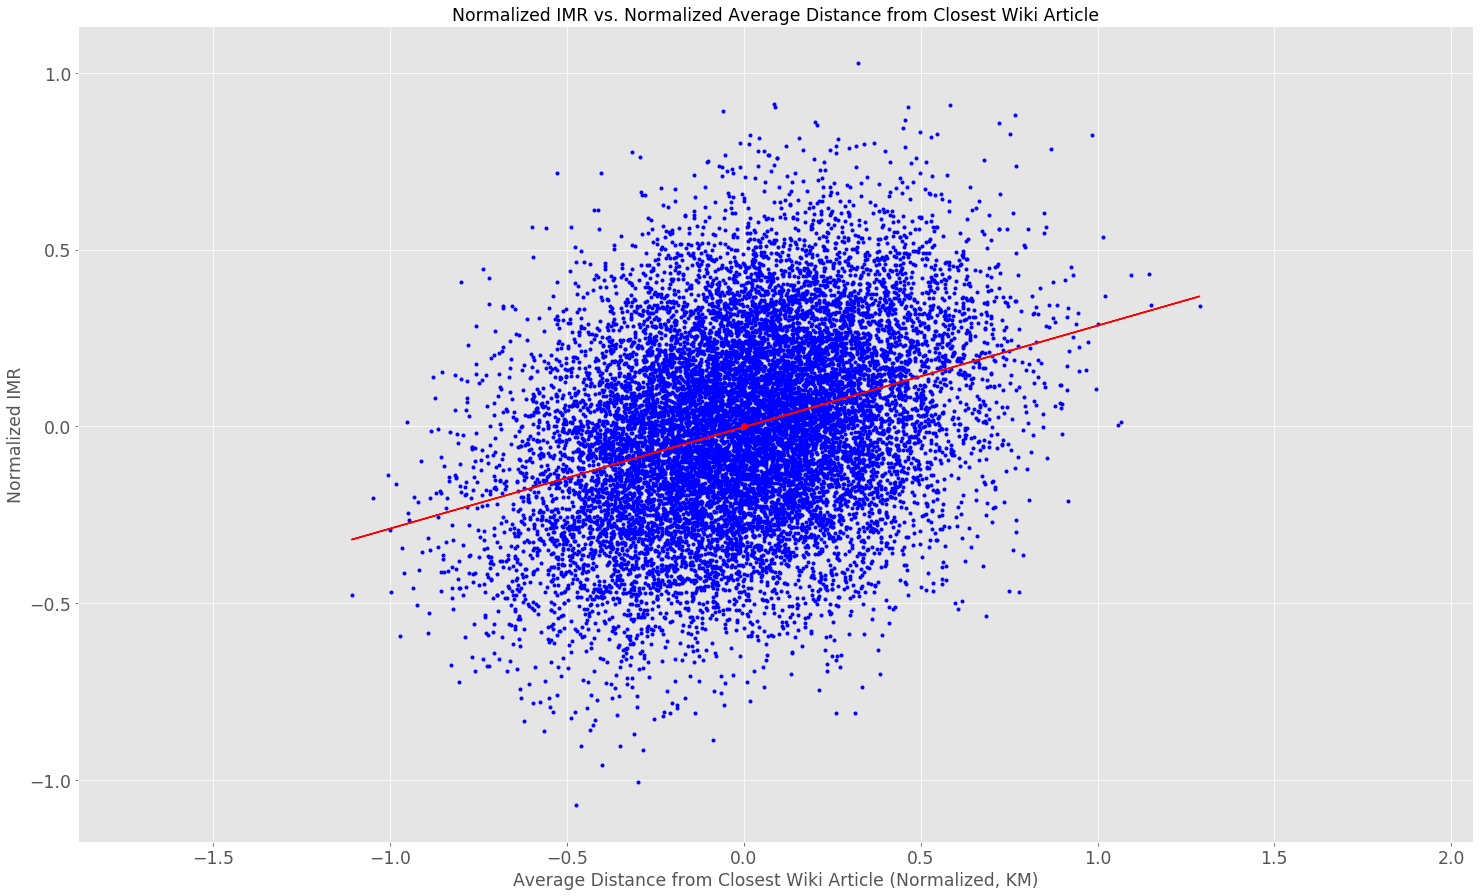

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

num_samples = 15000

# The desired mean values of the sample.
mu = np.array([0.0, 0.0, 0.0])

# The desired covariance matrix.
r = np.array([
        [  3.40, 2.75, 5.00],
        [ 9.00,  5.50,  1.50],
        [ -2.00,  6.50,  7.25]
    ])

# Generate the random samples.
y = np.random.multivariate_normal(mu, r, size=num_samples)

plt.plot(y[:,0]/10, y[:,1]/10, 'b.')
plt.plot(mu[0], mu[1], 'ro')
plt.ylabel('Normalized IMR')
plt.xlabel('Average Distance from Closest Wiki Article (Normalized, KM)')
plt.axis('equal')
plt.title("Normalized IMR vs. Normalized Average Distance from Closest Wiki Article")
plt.grid(True)
slope, intercept, r_value, p_value, std_err = stats.linregress(y[:,0]/10, y[:,1]/10)
line = slope*(y[:,0]/10)+intercept
plt.plot(y[:,0]/10, line, 'r', label='fitted line')

In [108]:
huge_df = pd.read_csv('enwiki-20190320-words-frequency.txt', header=None, delimiter=" ", names=["Word","Count"])

In [110]:
huge_df.set_index("Word")

,Count
Word,
the,151983633
of,71874676
and,62210193
in,62004799
to,43364193
was,26559707
is,20923272
for,17970059
on,17582287


In [130]:
huge_df.describe()
# ax = huge_df.plot.hist(bins=1000, density=True)
# plt.yscale("log")
# plt.xscale("log")
# ax = huge_df.head(10).plot.bar()
# plt.ylabel("Count")
# ax.set_xlabel("")
# plt.title("Article Counts of Top 20 Article Categories")

,Count
count,2.184780e+06
mean,8.912352e+02
std,1.392143e+05
min,3.000000e+00
25%,5.000000e+00
50%,1.100000e+01
75%,3.200000e+01
max,1.519836e+08
